# <p style="background-color:lightgray; font-family:verdana; font-size:200%; text-align:center; border-radius: 15px 20px;"> Customer Churn Classification </p>

 👩🏻‍💻 **Louis Haugh**      
 ⏳ **[05-Mar-2023]** 



Classification Task - choose a model to predict whether a customer churn in the next 6 months.

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>


# <p style="padding:10px;background-color:#000000;margin:0;color:#eab578;font-family:arial;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> TABLE OF CONTENTS </p>
    
    
* [1. IMPORTING LIBRARIES](#1)
    
* [2. LOADING DATASET](#2)
  
* [3. DATA EXPLORATION](#3)

* [4. EDA](#4)

* [5. DATA PREPARATION FOR MODELLING](#5)

* [6. MODEL BUILDING](#6)

<a id="1"></a>
# <p style="padding:10px;background-color:#000000;margin:0;color:#eab578;font-family:arial;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing Libraries</p>

In [1]:
# data manipulation
import pandas as pd
import numpy as np
import pickle
import os

pd.set_option('display.max_colwidth', None)

# data vizualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, accuracy_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

<a id="2"></a>
# <p style="padding:10px;background-color:#000000;margin:0;color:#eab578;font-family:arial;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Loading the Dataset</p>

In [3]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()
# target column = 'Exited'

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<a id="3"></a>
# <p style="padding:10px;background-color:#000000;margin:0;color:#eab578;font-family:arial;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Exploration</p>

In [4]:
# simplify column names
df.columns = df.columns.str.lower()
df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [5]:
df.columns = ['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited']
df.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [6]:
df.shape

(10000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  int64  
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# duplicates and null checks

In [9]:
df.isna().sum()

row_number          0
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df1 = df.copy()

<a id="4"></a>
# <p style="padding:10px;background-color:#000000;margin:0;color:#eab578;font-family:arial;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">EDA</p>

In [12]:
df.describe()

,row_number,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
row_number,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
num_of_products,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
has_cr_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
is_active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [14]:
df.describe(include = 'O').T

,count,unique,top,freq
surname,10000,2932,Smith,32
geography,10000,3,France,5014
gender,10000,2,Male,5457


In [15]:
df['exited'].value_counts()
# after looking at the meta data on kaggle, I found that '1' signified a positive mark, as in '1' signified the customer did churn.

0    7963
1    2037
Name: exited, dtype: int64

This shows there is a class imbalance, we may need to make up for this imbalance through up/down sampling in a minute. 

In [16]:
print('Percentage of positive marks: {:.2%}'.format(df['exited'].mean()))

Percentage of positive marks: 20.37%


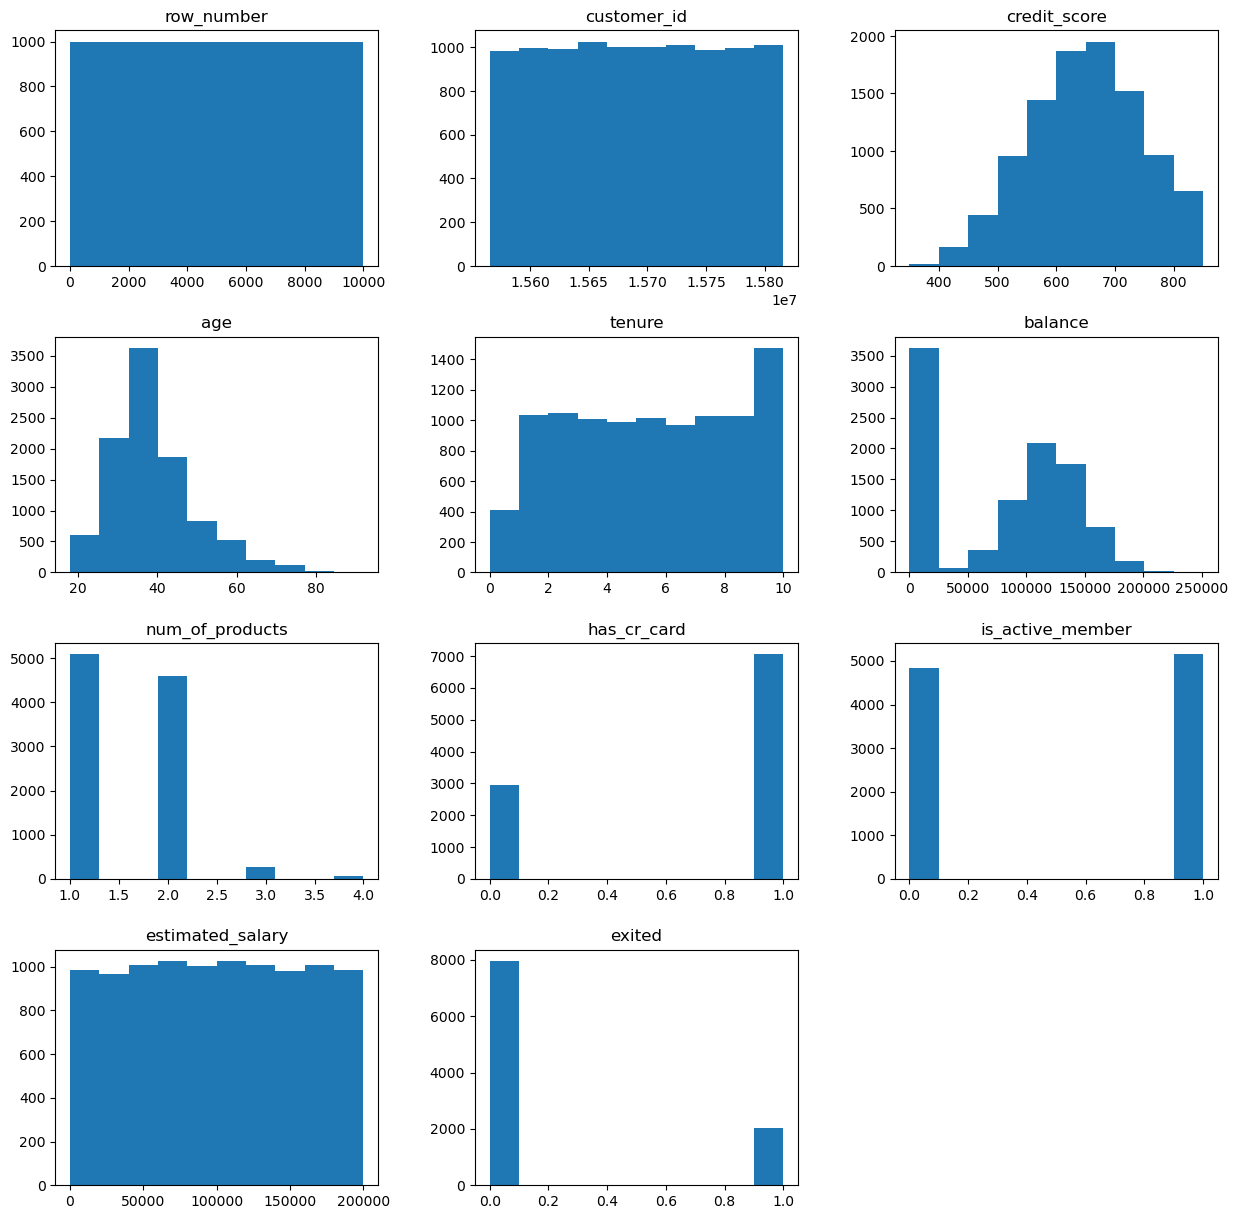

In [17]:
plt.style.use('default')
df.hist(figsize = (15,15), grid=False);

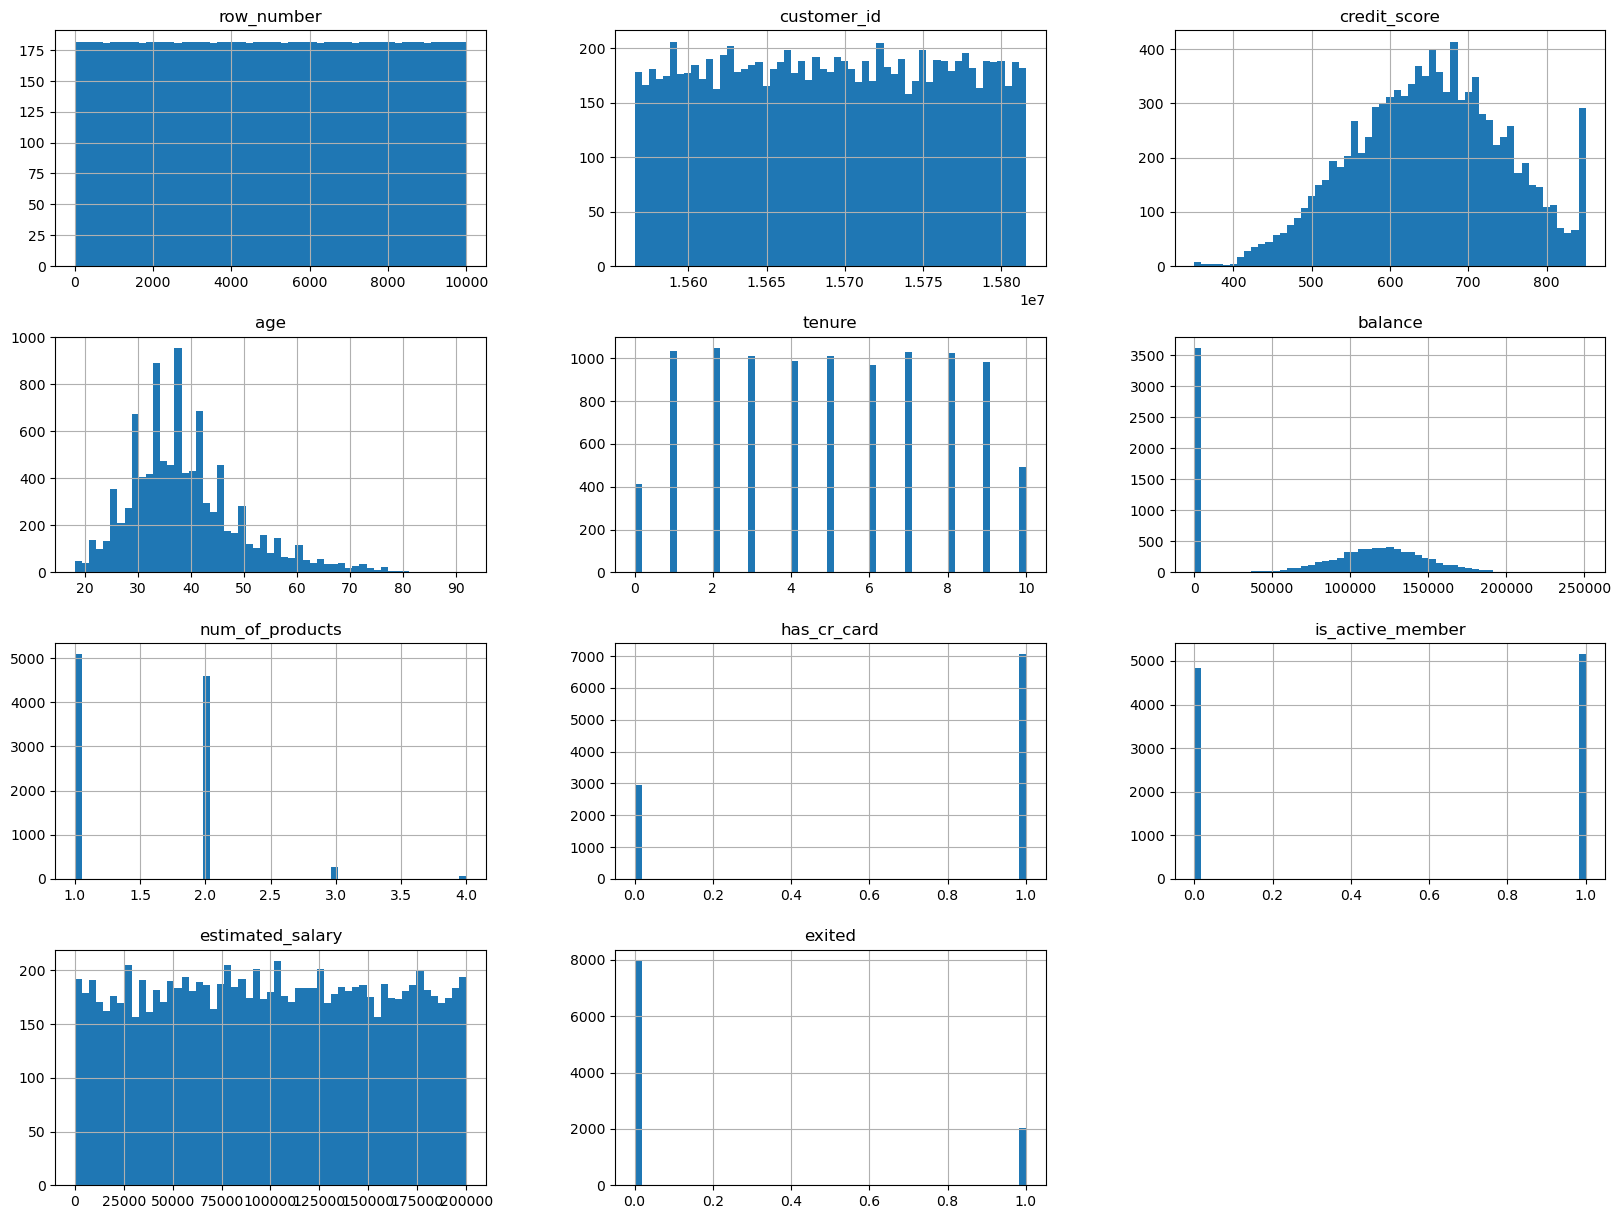

In [18]:
df.hist(bins = 55, figsize = (20,15), linewidth = 1.5)
plt.show()

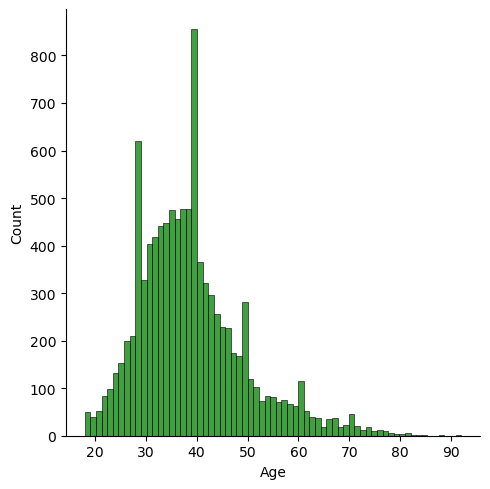

In [19]:
sns.displot(data = df, x='age', color = 'green')
plt.xlabel('Age')
plt.show()

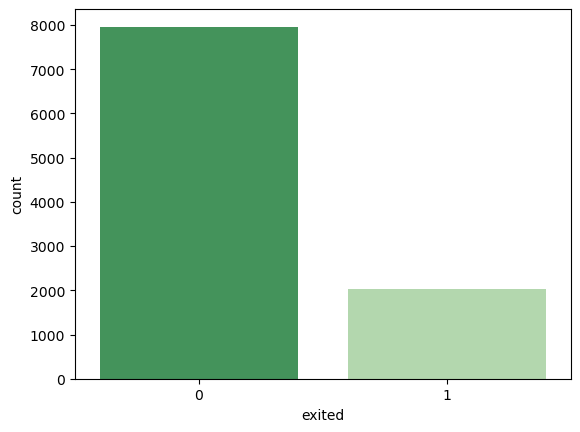

In [20]:
sns.countplot(data=df, x = 'exited', palette = 'Greens_r')
plt.show()

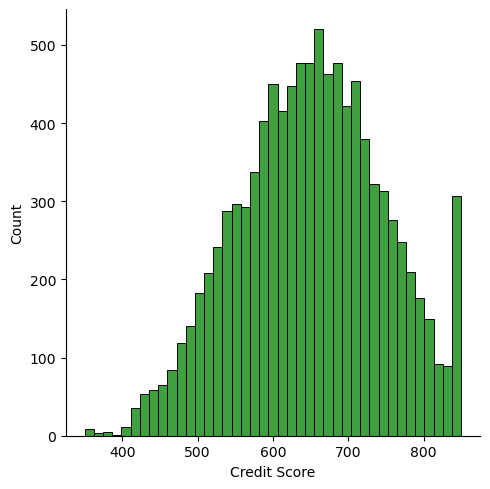

In [21]:
sns.displot(data = df, x='credit_score', color = 'green')
sns.set_palette('pastel')
plt.xlabel('Credit Score')
plt.show()

In [22]:
# removing all columns which could hinder analysis
df = df.drop(columns = ['surname', 'row_number', 'customer_id'])
df

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Text(0.1, 0.95, 'Correlation Map of Variables')

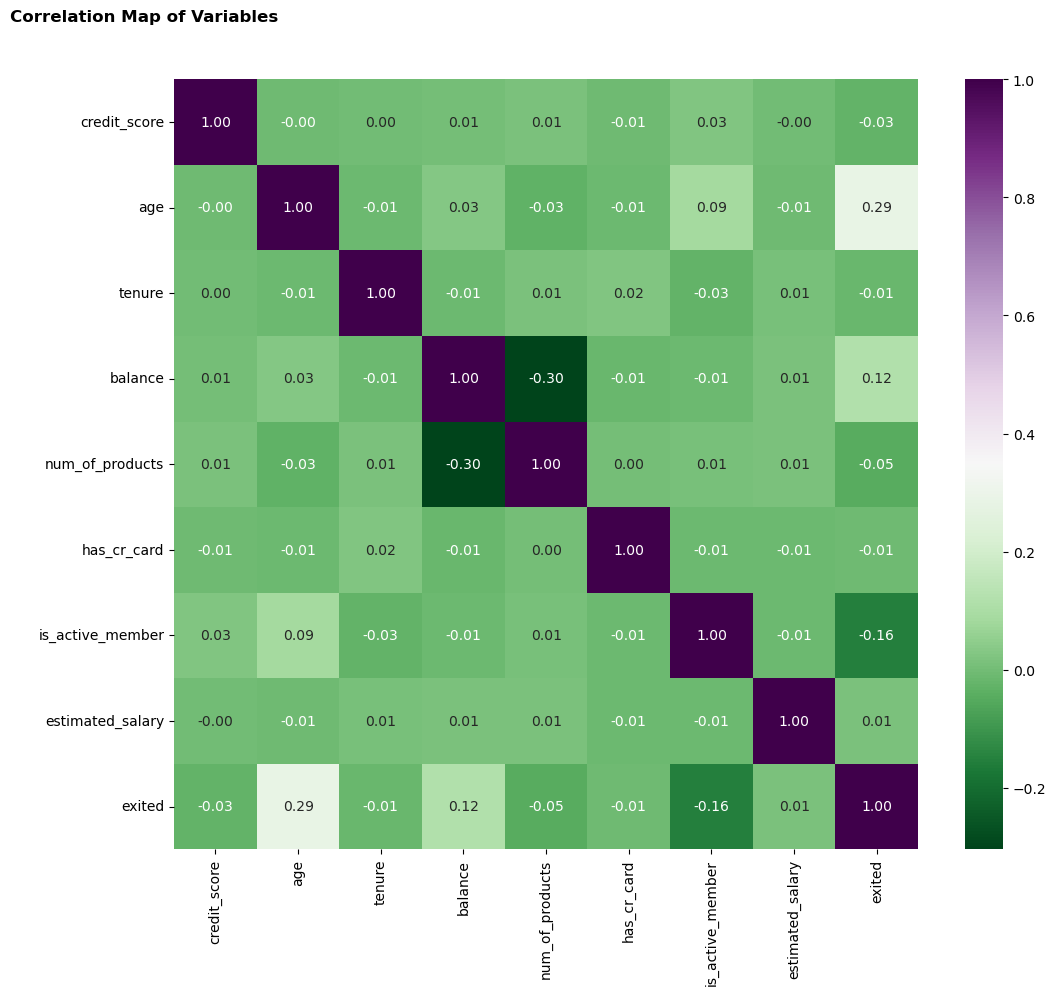

In [23]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="PRGn_r",fmt='.2f');
plt.suptitle('Correlation Map of Variables', fontweight = 'heavy', x = 0.10, y = 0.95)

We can see that 'Age' and 'Exited' have the largest correlation between values, whilst 'Balance' and 'Number of Products' have a relatively strong negative correlation. 
I would have expected a higher correlation between 'balance' and 'estimated salary.'And possibly 'tenure' and 'exited.'

The countplots I am about to show are Binary Countplots.
As in, each of the Binary variables are being plotted using the 'Exited' count as the Y variable. 

<AxesSubplot:xlabel='gender', ylabel='count'>

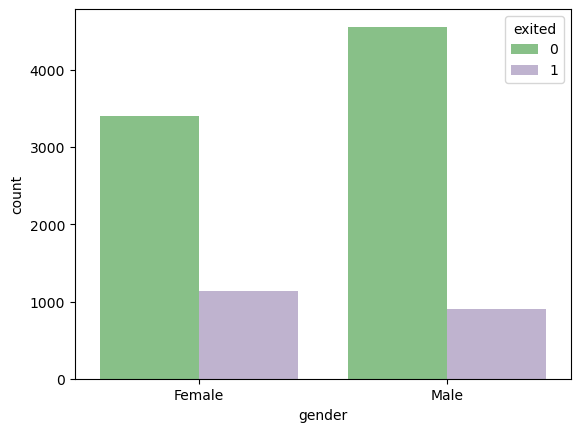

In [24]:
sns.countplot(data=df, x = 'gender', hue = 'exited', palette ='Accent')

<AxesSubplot:xlabel='has_cr_card', ylabel='count'>

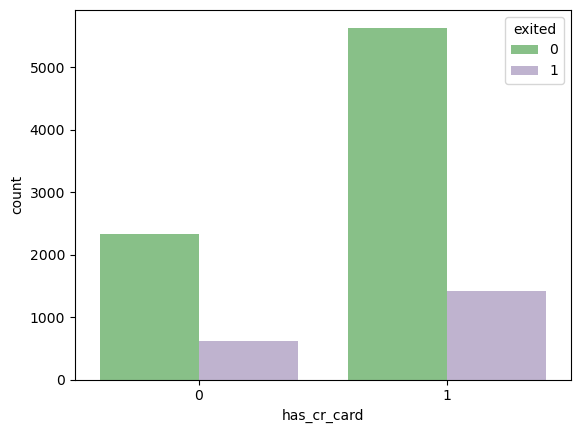

In [25]:
sns.countplot(data=df, x = 'has_cr_card', hue = 'exited', palette ='Accent')

<AxesSubplot:xlabel='is_active_member', ylabel='count'>

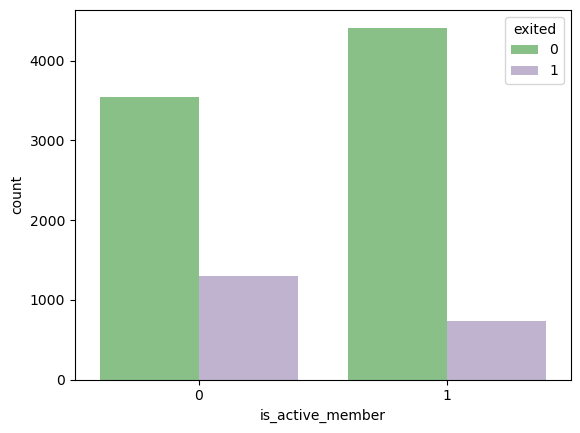

In [26]:
sns.countplot(data=df, x = 'is_active_member', hue = 'exited', palette ='Accent')

<AxesSubplot:xlabel='tenure', ylabel='count'>

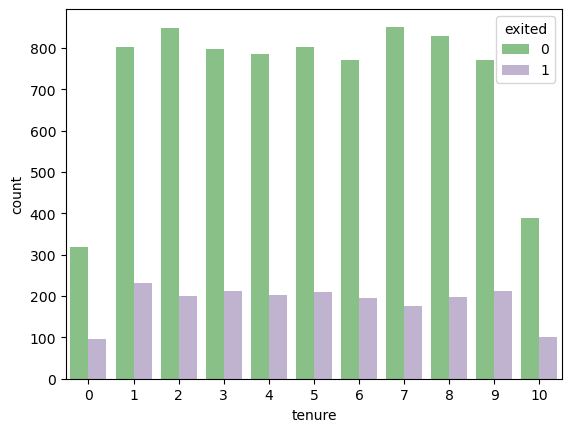

In [27]:
sns.countplot(data=df, x = 'tenure', hue = 'exited', palette ='Accent')

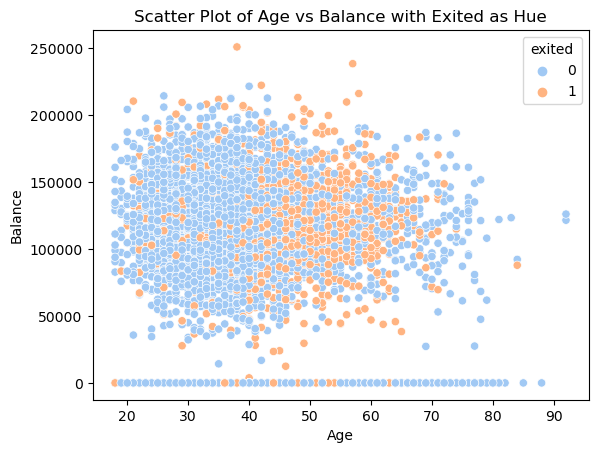

In [28]:
sns.scatterplot(x = 'age', y = 'balance', hue = 'exited', data = df)
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Scatter Plot of Age vs Balance with Exited as Hue')
plt.show()

From this plot, we can assume that 'age' will play a big part in whether or not a customer churns or not. It seems that if a customer is between 40-70 years old they are more likely to leave the bank. 

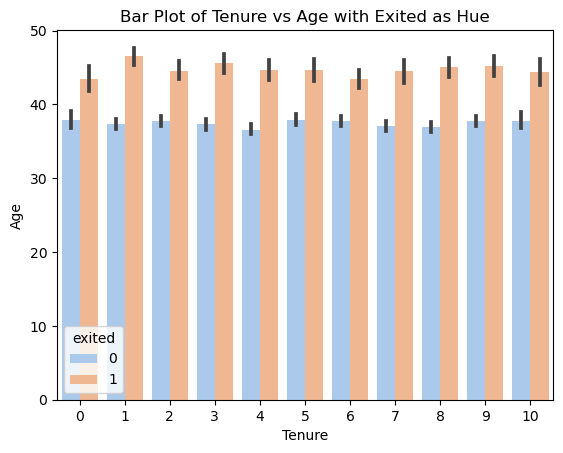

In [29]:
sns.barplot(x = 'tenure', y = 'age', hue = 'exited', data = df)
plt.xlabel('Tenure')
plt.ylabel('Age')
plt.title('Bar Plot of Tenure vs Age with Exited as Hue')
plt.show()

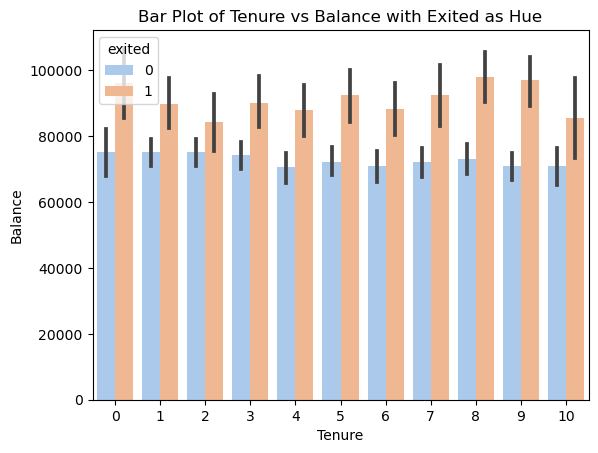

In [30]:
sns.barplot(x = 'tenure', y = 'balance', hue = 'exited', data = df)
plt.xlabel('Tenure')
plt.ylabel('Balance')
plt.title('Bar Plot of Tenure vs Balance with Exited as Hue')
plt.show()

This graph shows a bar plot with each year the customers have been at the bank on the X-axis, and the mean balance on the y-axis. It shows that those who have left the bank in the past have a higher balance, it also shows that the average balance falls as the tenure increases. 

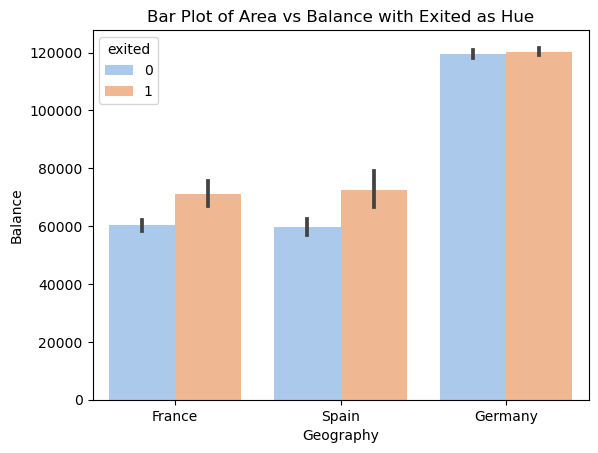

In [31]:
sns.barplot(x = 'geography', y = 'balance', hue = 'exited', data = df)
plt.xlabel('Geography')
plt.ylabel('Balance')
plt.title('Bar Plot of Area vs Balance with Exited as Hue')
plt.show()

<a id="5"></a>
# <p style="padding:10px;background-color:#000000;margin:0;color:#eab578;font-family:arial;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Prepatation for Modelling</p>

One Hot Encoding - the columns which are 'object' data types should be turned into quantitative features

In [32]:
object_cols = df.select_dtypes('object').columns.to_list()
object_cols

['geography', 'gender']

In [33]:
df['geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

In [34]:
df['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

geography


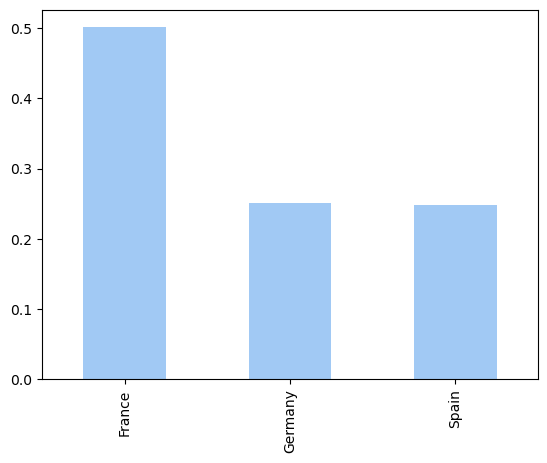

gender


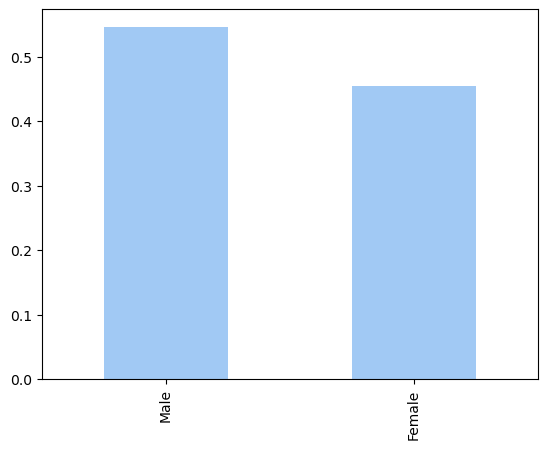

In [35]:
for col in object_cols:
    print(col)
    df[col].value_counts(normalize = True).round(3).plot(kind = 'bar')
    plt.show()

In [36]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df_le = df.copy(deep = True)
                
# df_le['gender'] = le.fit_transform(df_le['gender'])
# df_le['geography'] = le.fit_transform(df_le['geography'])
# df_le

In [37]:
gender_ohe = pd.get_dummies(df['gender'], drop_first=True)
geography_ohe = pd.get_dummies(df['geography'], drop_first=True)
df.drop(['gender', 'geography'], axis=1, inplace=True)

df_ohe = pd.concat([df, gender_ohe, geography_ohe], axis=1)

df_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [38]:
# One Hot Encoding (Dummies)
# 0 = Male, 1 = Female
# 1 in respective country = country, 0-0 = France


# Label Encoding

# gender (1=Male, 0=Female)
# geography (1 = Germany, 2 = Spain, 0 = France)

In [39]:
df_ohe.info()
# df_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   age               10000 non-null  int64  
 2   tenure            10000 non-null  int64  
 3   balance           10000 non-null  float64
 4   num_of_products   10000 non-null  int64  
 5   has_cr_card       10000 non-null  int64  
 6   is_active_member  10000 non-null  int64  
 7   estimated_salary  10000 non-null  float64
 8   exited            10000 non-null  int64  
 9   Male              10000 non-null  uint8  
 10  Germany           10000 non-null  uint8  
 11  Spain             10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


Splitting the Data

In [40]:
# splitting the data into a training, validation and test set
# train data = 80%
# test and validation data, 10% each

In [41]:
def split_data(df_ohe, target_column):
    return df_ohe.drop(columns=[target_column], axis=1), df_ohe[target_column]

# if using dummies, 'df_le' must be changed to 'df_ohe' in this code block and the following code block. 

In [42]:
X, y = split_data(df_ohe,'exited')

In [43]:
X_df, X_val, y_df, y_val = ( 
                                train_test_split(
                                X, y, test_size=0.2, random_state=42)
)

In [44]:
X_train, X_test, y_train, y_test = (
                        train_test_split(
                        X_df, y_df, test_size = 0.25, random_state = 42))

In [45]:
print('Objects of train:', len(X_train))
print('Objects of valid:', len(X_val))
print('Objects of test:', len(y_test))
print('Sum of objects:', len(y_train) + len(X_val) + len(X_test))
print()
print('Objects of original set (check sum):', len(df_ohe))

Objects of train: 6000
Objects of valid: 2000
Objects of test: 2000
Sum of objects: 10000

Objects of original set (check sum): 10000


Min-Max Scaler

In [46]:
# from sklearn.preprocessing import MinMaxScaler
# mm_scaler = MinMaxScaler()

# numeric = ['credit_score', 'age', 'balance', 'estimated_salary']
# mm_scaler.fit(X_train[numeric])
# pd.options.mode.chained_assignment = None
# X_train[numeric] = mm_scaler.transform(X_train[numeric])
# X_train.head()

In [47]:
# X_val[numeric] = mm_scaler.transform(X_val[numeric])
# X_val.head()

In [48]:
# X_test[numeric] = mm_scaler.transform(X_test[numeric])
# X_test.head()

Scaling using a Standard Scaler

In [49]:
numeric = ['credit_score', 'age', 'balance', 'estimated_salary']
ss_scaler = StandardScaler()
ss_scaler.fit(X_train[numeric])
pd.options.mode.chained_assignment = None
X_train[numeric] = ss_scaler.transform(X_train[numeric])
X_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,Male,Germany,Spain
8588,0.626553,-0.948125,7,0.026803,1,1,0,0.389943,0,0,1
3178,-1.143262,0.006684,4,0.538874,2,1,1,-1.026089,0,0,0
5200,-1.455583,0.293126,9,0.283178,2,1,0,-1.486725,1,1,0
8889,-0.747657,0.006684,9,0.833254,1,1,0,-0.246001,0,0,0
5789,0.387107,1.534377,1,0.000856,1,1,0,-1.006993,0,1,0


In [50]:
X_val[numeric] = ss_scaler.transform(X_val[numeric])
X_val.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,Male,Germany,Spain
6252,-0.581086,-0.661682,3,0.327195,2,0,0,-1.017034,1,1,0
4684,-0.299998,0.388607,1,-1.218934,2,1,1,0.805136,1,0,0
1731,-0.529032,0.484088,4,-1.218934,2,1,0,-0.724818,0,0,1
4742,-1.518047,1.916301,8,0.686002,2,1,1,1.228495,1,1,0
4521,-0.955870,-1.139087,7,0.779430,1,1,1,0.252697,0,0,1


In [51]:
X_test[numeric] = ss_scaler.transform(X_test[numeric])
X_test.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,Male,Germany,Spain
3188,1.553103,-0.661682,4,-0.017150,1,1,1,-1.084803,0,0,0
8293,1.188729,-1.043606,4,0.231074,1,0,1,-1.368802,0,1,0
1710,1.834191,-1.043606,8,0.935642,1,1,0,-0.362538,1,0,1
7510,1.521871,-0.279759,1,-1.218934,2,1,1,1.025781,1,0,0
1461,-0.424926,-0.470721,4,-1.218934,2,1,0,1.233214,1,0,1


<a id="6"></a>
# <p style="padding:10px;background-color:#000000;margin:0;color:#eab578;font-family:arial;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Model Building</p>

# <div style="font-family: Trebuchet MS; background-color: #000000; color: #FFFFFF; padding: 12px; line-height: 1.5;">Logistic Regression
<div style="font-family:arial; line-height: 2; color: #000000; text-align: justify">

In [52]:
LR = LogisticRegression(random_state = 35, solver = 'liblinear')
LR.fit(X_train, y_train)
predict_valid = LR.predict(X_val)
print('Accuracy Score: ', f1_score(y_val, predict_valid))

Accuracy Score:  0.29158878504672897


Scores quite poorly on the F1 indicator. To make up for this, I am going to balance the 'class_weight.'

In [53]:
LR = LogisticRegression(random_state = 35, solver = 'liblinear', class_weight = 'balanced')
LR.fit(X_train, y_train)
predict_valid = LR.predict(X_val)
print('Accuracy Score: ', f1_score(y_val, predict_valid))

Accuracy Score:  0.5066904549509367


The score comes out far better than initially, showing that the class imbalance does play a part in how strong our models can be when predicting customer churn. 

# <div style="font-family: Trebuchet MS; background-color: #000000; color: #FFFFFF; padding: 12px; line-height: 1.5;">Random Forest
<div style="font-family:arial; line-height: 2; color: #000000; text-align: justify">

In [54]:
RFC = RandomForestClassifier(random_state =35, n_estimators = 8)
RFC.fit(X_train, y_train)
predict_valid = RFC.predict(X_val)
print('F1:', f1_score(y_val, predict_valid))

F1: 0.532051282051282


In [55]:
RFC = RandomForestClassifier(random_state =35, n_estimators = 8, class_weight = 'balanced')
RFC.fit(X_train, y_train)
predict_valid = RFC.predict(X_val)
print('F1:', f1_score(y_val, predict_valid))

F1: 0.5008183306055646


I, again, tried to balance the class weight, however it came out with a worse score than initially. 

# <div style="font-family: Trebuchet MS; background-color: #000000; color: #FFFFFF; padding: 12px; line-height: 1.5;">Support Vector Machines
<div style="font-family:arial; line-height: 2; color: #000000; text-align: justify">

In [56]:
svc = SVC()
svc.fit(X_train, y_train)
predict_valid = svc.predict(X_val)
print('F1:', f1_score(y_val, predict_valid))

print('The accuracy of the SVC for train is {:.2f}'.format(svc.score(X_train, y_train)))
print('The accuracy of the SVC for test is {:.2f}'.format(svc.score(X_test, y_test)))
print('The accuracy of the SVC for validation is {:.2f}'.format(svc.score(X_val, y_val)))

F1: 0.19954648526077098
The accuracy of the SVC for train is 0.82
The accuracy of the SVC for test is 0.82
The accuracy of the SVC for validation is 0.82


The F1 score is very low, which tells me that SVC's should not be used for this classification task - without further parameter tuning.

# <div style="font-family: Trebuchet MS; background-color: #000000; color: #FFFFFF; padding: 12px; line-height: 1.5;">KNN
<div style="font-family:arial; line-height: 2; color: #000000; text-align: justify">

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [58]:
print("The accuracy score of the KNN for Train is {:.2f}".format(knn.score(X_train, y_train)))

The accuracy score of the KNN for Train is 0.87


In [59]:
train_predictions = knn.predict(X_train)

In [60]:
print("The accuracy score of KNN for test is {:.2f}".format(knn.score(X_test, y_test)))

The accuracy score of KNN for test is 0.82


# <div style="font-family: Trebuchet MS; background-color: #000000; color: #FFFFFF; padding: 12px; line-height: 1.5;">Model Testing and Validation
<div style="font-family:arial; line-height: 2; color: #000000; text-align: justify">

In [61]:
table_of_model = []
table_of_prec = []
table_of_acc = []

Logistic Regression

In [62]:
predictions_test = LR.predict(X_test)
test_f1 = f1_score(y_test, predictions_test)
test_acc = accuracy_score(y_test, predictions_test)

print("Accuracy")
print("Test set:", test_acc)
print("F1-мера")
print("Test set:", test_f1)

table_of_acc.append(round(test_acc, 2))
table_of_prec.append(round(test_f1, 2))
table_of_model.append('LogisticRegression')

Accuracy
Test set: 0.7225
F1-мера
Test set: 0.5211389128559103


Random Forest

In [63]:
predictions_test = RFC.predict(X_test)
test_f1 = f1_score(y_test, predictions_test)
test_acc = accuracy_score(y_test, predictions_test)

print("Accuracy")
print("Test set:", test_acc)
print("F1-мера")
print("Test set:", test_f1)

table_of_acc.append(round(test_acc, 2))
table_of_prec.append(round(test_f1, 2))
table_of_model.append('RandomForestClassifier')

Accuracy
Test set: 0.853
F1-мера
Test set: 0.5420560747663552


In [64]:
RFC.feature_importances_

array([0.13504858, 0.25059295, 0.08026475, 0.15118255, 0.12939511,
       0.02072892, 0.03243579, 0.13808718, 0.02094296, 0.02746864,
       0.01385257])

In [65]:
X_test.columns

Index(['credit_score', 'age', 'tenure', 'balance', 'num_of_products',
       'has_cr_card', 'is_active_member', 'estimated_salary', 'Male',
       'Germany', 'Spain'],
      dtype='object')

In [66]:
fi = pd.DataFrame({'Variable':X_test.columns,'fi':RFC.feature_importances_})
fi.sort_values('fi',ascending=False)

,Variable,fi
1,age,0.250593
3,balance,0.151183
7,estimated_salary,0.138087
0,credit_score,0.135049
4,num_of_products,0.129395
2,tenure,0.080265
6,is_active_member,0.032436
9,Germany,0.027469
8,Male,0.020943
5,has_cr_card,0.020729


SVC

In [67]:
predictions_test = svc.predict(X_test)
test_f1 = f1_score(y_test, predictions_test)
test_acc = accuracy_score(y_test, predictions_test)

print("Accuracy")
print("Test set:", test_acc)
print("F1-мера")
print("Test set:", test_f1)

table_of_acc.append(round(test_acc, 2))
table_of_prec.append(round(test_f1, 2))
table_of_model.append('SVC')

Accuracy
Test set: 0.8195
F1-мера
Test set: 0.23354564755838642


KNN

In [68]:
predictions_test = knn.predict(X_test)
test_f1 = f1_score(y_test, predictions_test)
test_acc = accuracy_score(y_test, predictions_test)

print("Accuracy")
print("Test set:", test_acc)
print("F1-мера")
print("Test set:", test_f1)

table_of_acc.append(round(test_acc, 2))
table_of_prec.append(round(test_f1, 2))
table_of_model.append('KNN')

Accuracy
Test set: 0.818
F1-мера
Test set: 0.4222222222222223


In [69]:
table_of_models = (pd.DataFrame({'Model':table_of_model, 'Accuracy':table_of_acc, 
                                'F1 score':table_of_prec}).sort_values(by='F1 score', ascending=False).
                  reset_index(drop=True))
table_of_models['Model Quality'] = (
                   table_of_models['F1 score'].apply(lambda x: 'good model' if x>=0.52 else 'bad model')
)
table_of_models

,Model,Accuracy,F1 score,Model Quality
0,RandomForestClassifier,0.85,0.54,good model
1,LogisticRegression,0.72,0.52,good model
2,KNN,0.82,0.42,bad model
3,SVC,0.82,0.23,bad model


# <div style="font-family: Trebuchet MS; background-color: #000000; color: #FFFFFF; padding: 12px; line-height: 1.5;">Upsampling
<div style="font-family:arial; line-height: 2; color: #000000; text-align: justify">

In [70]:
def upsample (X, y, repeat):
    X_zeroes = X[y == 0]
    X_ones  = X[y == 1]
    y_zeroes = y[y == 0]
    y_ones  = y[y == 1]
    
    X_upsampled = pd.concat([X_zeroes] + [X_ones] * repeat)
    y_upsampled = pd.concat([y_zeroes] + [y_ones] * repeat)
    
    X_upsampled = shuffle(X_upsampled, random_state = 35)
    y_upsampled = shuffle(y_upsampled, random_state = 35)
    
    return X_upsampled, y_upsampled

X_upsampled, y_upsampled = upsample(X_train, y_train, 5)

print(X_upsampled.shape)
print(y_upsampled.shape)

    

(10924, 11)
(10924,)


In [71]:
table_of_up_model = []
table_of_up_acc = []

Logistic Regression

In [72]:
LR = LogisticRegression(random_state = 35, solver = 'liblinear')
LR.fit(X_upsampled, y_upsampled)
predict_valid = LR.predict(X_val)
print('F1: ', f1_score(y_val, predict_valid))


test_acc = f1_score(y_val, predict_valid)
table_of_up_acc.append(round(test_acc, 2))
table_of_up_model.append('LogisticRegression')

F1:  0.46636085626911317


Random Forest

In [73]:
RFC = RandomForestClassifier(random_state =35, n_estimators = 8)
RFC.fit(X_upsampled, y_upsampled)
predict_valid = RFC.predict(X_val)
print('F1:', f1_score(y_val, predict_valid))


test_acc = f1_score(y_val, predict_valid)
table_of_up_acc.append(round(test_acc, 2))
table_of_up_model.append('Random Forest')

F1: 0.5402298850574713


SVC

In [74]:
svc = SVC()
svc.fit(X_upsampled, y_upsampled)
predict_valid = svc.predict(X_val)
print('F1:', f1_score(y_val, predict_valid))

print('The accuracy of the SVC for train is {:.2f}'.format(svc.score(X_train, y_train)))
print('The accuracy of the SVC for test is {:.2f}'.format(svc.score(X_test, y_test)))
print('The accuracy of the SVC for validation is {:.2f}'.format(svc.score(X_val, y_val)))

test_acc = f1_score(y_val, predict_valid)
table_of_up_acc.append(round(test_acc, 2))
table_of_up_model.append('SVC')

F1: 0.5189456342668862
The accuracy of the SVC for train is 0.74
The accuracy of the SVC for test is 0.71
The accuracy of the SVC for validation is 0.71


KNN

In [75]:
knn = KNeighborsClassifier()

knn.fit(X_upsampled, y_upsampled)
predict_valid = knn.predict(X_val)

print('F1:', f1_score(y_val, predict_valid))

test_acc = f1_score(y_val, predict_valid)
table_of_up_acc.append(round(test_acc, 2))
table_of_up_model.append('KNN')

F1: 0.49134948096885805


In [76]:
table_of_up_models = (pd.DataFrame({'Model':table_of_model, 'Accuracy':table_of_acc}).sort_values(by = 'Accuracy', ascending = False).
                  reset_index(drop=True))
table_of_up_models['Model Quality'] = (
                   table_of_models['Accuracy'].apply(lambda x: 'good model' if x>=0.84 else 'bad model')
)
table_of_up_models

,Model,Accuracy,Model Quality
0,RandomForestClassifier,0.85,good model
1,SVC,0.82,bad model
2,KNN,0.82,bad model
3,LogisticRegression,0.72,bad model


In [78]:
# here is the table of the initial F1 and accuracy scores, prior to upsampling the target value.
# all of the models' f1 scores improved


table_of_models = (pd.DataFrame({'Model':table_of_model, 'Accuracy':table_of_acc, 
                                'F1 score':table_of_prec}).sort_values(by='F1 score', ascending=False).
                  reset_index(drop=True))
table_of_models['Model Quality'] = (
                   table_of_models['F1 score'].apply(lambda x: 'good model' if x>=0.52 else 'bad model')
)
table_of_models

,Model,Accuracy,F1 score,Model Quality
0,RandomForestClassifier,0.85,0.54,good model
1,LogisticRegression,0.72,0.52,good model
2,KNN,0.82,0.42,bad model
3,SVC,0.82,0.23,bad model


# <div style="font-family: Trebuchet MS; background-color: #000000; color: #FFFFFF; padding: 12px; line-height: 1.5;">Training Models and Creating AUC/ROC Visualisations
<div style="font-family:arial; line-height: 2; color: #000000; text-align: justify">

Logistic Regression

In [79]:
grid_logist = {
            'intercept_scaling':[0.5, 1.0, 1.5],
            'class_weight': [None, 'balanced'],
            'C': [0.5, 1, 1.5]
            }
model = LogisticRegression(solver = 'liblinear', random_state = 35)

grid_search = GridSearchCV(model, grid_logist, cv = 5, scoring = 'f1')

grid_search.fit(X_upsampled, y_upsampled)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=35, solver='liblinear'),
             param_grid={'C': [0.5, 1, 1.5], 'class_weight': [None, 'balanced'],
                         'intercept_scaling': [0.5, 1.0, 1.5]},
             scoring='f1')

In [80]:
grid_search.best_params_

{'C': 1, 'class_weight': None, 'intercept_scaling': 1.0}

In [81]:
# now we apply these parameters
model_LR = LogisticRegression(C = 1, class_weight = None, intercept_scaling = 1, solver = 'liblinear', random_state = 35)
model_LR.fit(X_upsampled, y_upsampled)
predict_valid = model_LR.predict(X_val)
print('F1:', f1_score(y_val, predict_valid))

F1: 0.46636085626911317


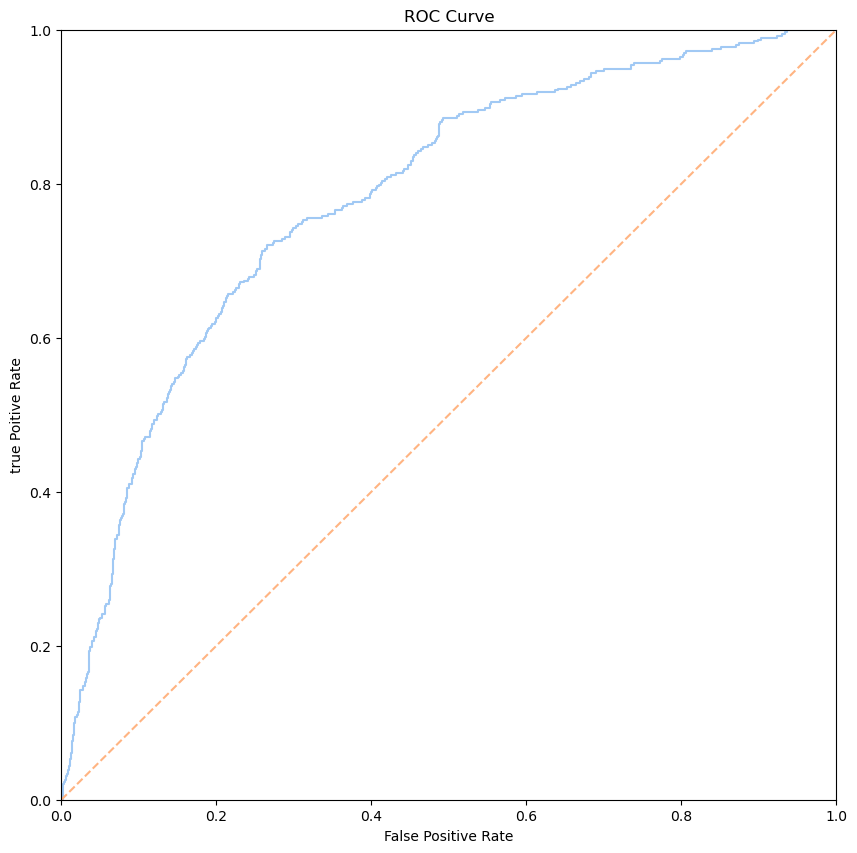

AUC: 0.7819130996546597


In [82]:
probabilities_val = model_LR.predict_proba(X_val)
proba_one_val = probabilities_val[:,1]

fpr, tpr, thresholds = roc_curve(y_val, proba_one_val)

plt.figure(figsize = (10,10))
plt.plot(fpr, tpr, linestyle = '-')
plt.plot([0,1], [0,1], linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('true Poitive Rate')
plt.title('ROC Curve')

plt.show()

auc_roc = roc_auc_score (y_val, proba_one_val)
print('AUC:', auc_roc)

Random Forest

In [83]:
grid_RF = {
            'n_estimators': [3, 5, 7, 9, 11, 15],
            'criterion': ['gini', 'entropy'],
            'min_samples_split': range(5, 15)
            }
model = RandomForestClassifier(random_state = 35)

grid_search = GridSearchCV(model, grid_RF, cv = 5, scoring = 'accuracy')

grid_search.fit(X_upsampled, y_upsampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=35),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': range(5, 15),
                         'n_estimators': [3, 5, 7, 9, 11, 15]},
             scoring='accuracy')

In [84]:
grid_search.best_params_

{'criterion': 'gini', 'min_samples_split': 5, 'n_estimators': 15}

In [85]:
model_RFC = RandomForestClassifier(random_state = 35, criterion = 'gini',
                                   min_samples_split = 5, n_estimators = 15)
model_RFC.fit(X_upsampled, y_upsampled)
RFC_predicted_val = model_RFC.predict(X_val)
print('F1:', f1_score(y_val, RFC_predicted_val))

F1: 0.5919165580182529


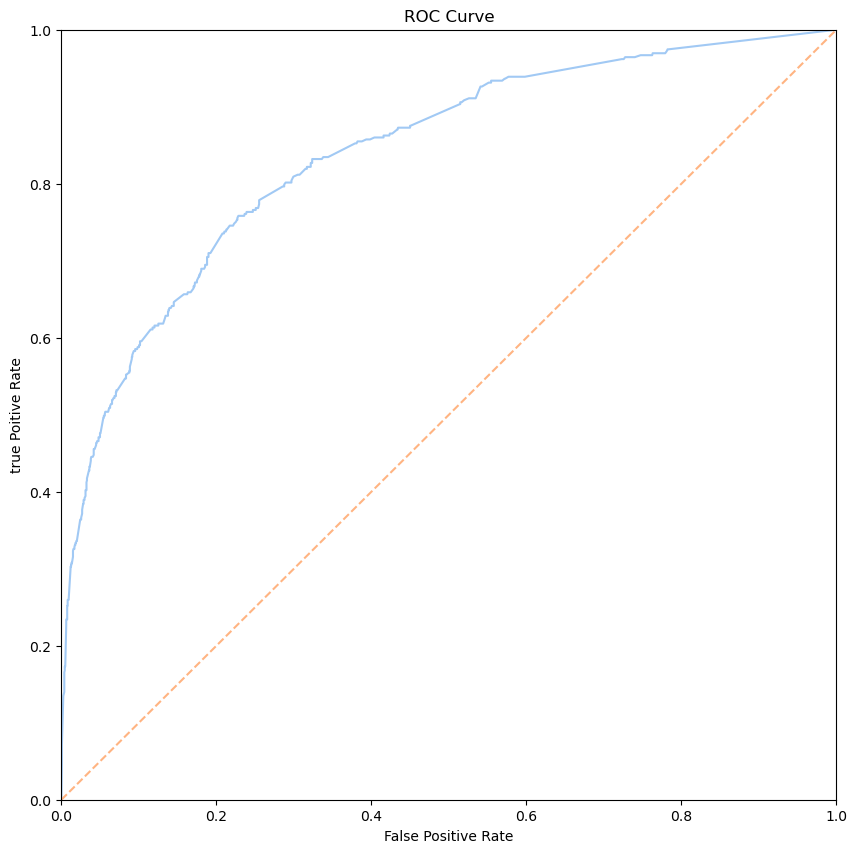

AUC: 0.8390549615153804


In [86]:
probabilities_val = model_RFC.predict_proba(X_val)
proba_one_val = probabilities_val[:,1]

fpr, tpr, thresholds = roc_curve(y_val, proba_one_val)

plt.figure(figsize = (10,10))
plt.plot(fpr, tpr, linestyle = '-')
plt.plot([0,1], [0,1], linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('true Poitive Rate')
plt.title('ROC Curve')

plt.show()

auc_roc = roc_auc_score (y_val, proba_one_val)
print('AUC:', auc_roc)

This AUC scores tells us Random Forest is a better model than our Logistic Regresison model

KNN

In [87]:
grid_KNN = {
            'n_neighbors': [2, 5, 7, 10, 15, 25],
            'metric': ['euclidean', 'manhatten', 'minkowski'],
            'weights': ['uniform', 'distance']
            }
model = KNeighborsClassifier()

grid_search = GridSearchCV(model, grid_KNN, cv = 5, scoring = 'accuracy')

grid_search.fit(X_upsampled, y_upsampled)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhatten', 'minkowski'],
                         'n_neighbors': [2, 5, 7, 10, 15, 25],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [88]:
grid_search.best_params_

{'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}

In [89]:
model_KNN = KNeighborsClassifier(n_neighbors = 2,
                                   metric = 'euclidean', weights = 'distance')
model_KNN.fit(X_upsampled, y_upsampled)
predicted_val = model_KNN.predict(X_val)
print('F1:', f1_score(y_val, predicted_val))

F1: 0.4377457404980341


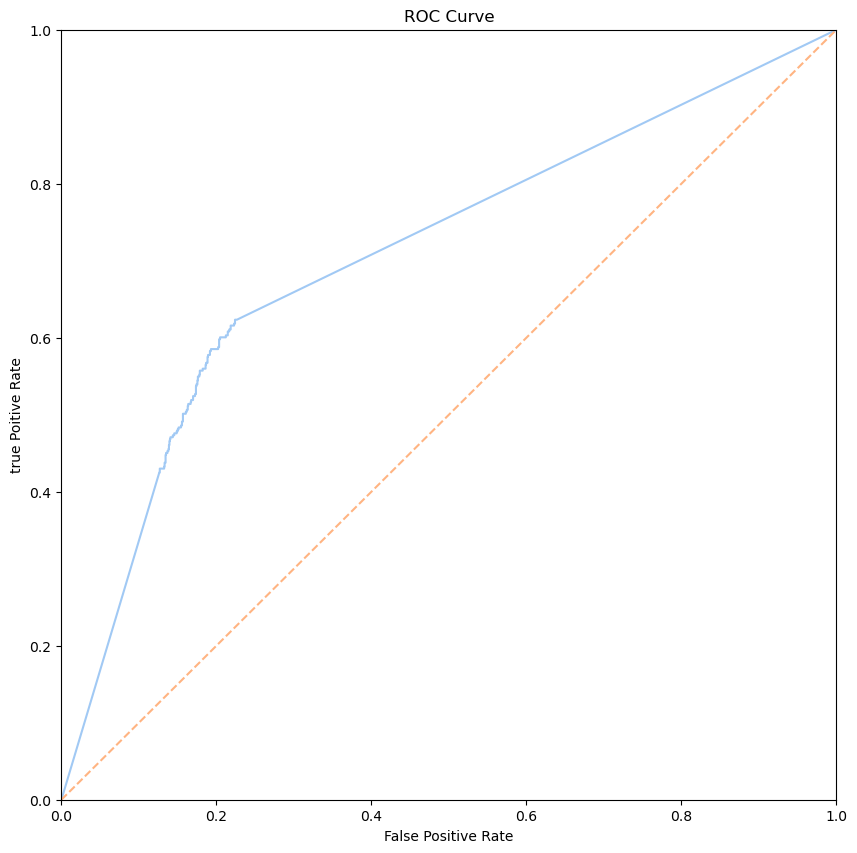

AUC: 0.7083885545268712


In [90]:
probabilities_val = model_KNN.predict_proba(X_val)
proba_one_val = probabilities_val[:,1]

fpr, tpr, thresholds = roc_curve(y_val, proba_one_val)

plt.figure(figsize = (10,10))
plt.plot(fpr, tpr, linestyle = '-')
plt.plot([0,1], [0,1], linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('true Poitive Rate')
plt.title('ROC Curve')

plt.show()

auc_roc = roc_auc_score (y_val, proba_one_val)
print('AUC:', auc_roc)

This model gave us a worse AUC score than both previous models, although it is still a better indicator than random (50/50).

SVC

In [91]:
kernel_range = ['linear', 'poly', 'rbf', 'sigmoid']
C_range = range(1, 10, 2)
degree_range = range(1, 5)
max_iter_range = [-1, 1, 2]

# putting it togther
grid = dict(kernel = kernel_range, C = C_range, degree = degree_range, max_iter = max_iter_range)

In [92]:
grid

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
 'C': range(1, 10, 2),
 'degree': range(1, 5),
 'max_iter': [-1, 1, 2]}

In [93]:
grid_search = GridSearchCV(estimator = SVC() 
                           ,param_grid = grid
                           ,n_jobs = -1 # parallel processing
                           ,cv = 3 # cross validation
                           ,scoring ='accuracy')

# fit the model on train data
grid_result_svc = grid_search.fit(X_upsampled, y_upsampled)

# summarize results
grid_result_svc_df = pd.DataFrame(grid_result_svc.cv_results_)

In [94]:
grid_result_svc_df.sort_values(by = 'rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_kernel,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
222,5.491732,0.186236,3.634830,0.169007,9,3,rbf,-1,"{'C': 9, 'degree': 3, 'kernel': 'rbf', 'max_iter': -1}",0.791049,0.788245,0.786597,0.78863,0.001838,1
198,4.940494,0.181800,3.193975,0.008747,9,1,rbf,-1,"{'C': 9, 'degree': 1, 'kernel': 'rbf', 'max_iter': -1}",0.791049,0.788245,0.786597,0.78863,0.001838,1
210,5.832798,0.311048,3.618906,0.403795,9,2,rbf,-1,"{'C': 9, 'degree': 2, 'kernel': 'rbf', 'max_iter': -1}",0.791049,0.788245,0.786597,0.78863,0.001838,1
234,5.481266,0.050158,3.904419,0.188020,9,4,rbf,-1,"{'C': 9, 'degree': 4, 'kernel': 'rbf', 'max_iter': -1}",0.791049,0.788245,0.786597,0.78863,0.001838,1
174,4.700322,0.077477,3.320667,0.185719,7,3,rbf,-1,"{'C': 7, 'degree': 3, 'kernel': 'rbf', 'max_iter': -1}",0.787479,0.788245,0.788245,0.78799,0.000361,5


In [95]:
grid_result_svc.best_estimator_

SVC(C=9, degree=1)

In [96]:
model_svc = SVC(random_state = 35, C = 5,
                                   degree = 1, probability = True)
model_svc.fit(X_upsampled, y_upsampled)
svc_predicted_val = model_svc.predict(X_val)
print('F1:', f1_score(y_val, svc_predicted_val))

F1: 0.537542662116041


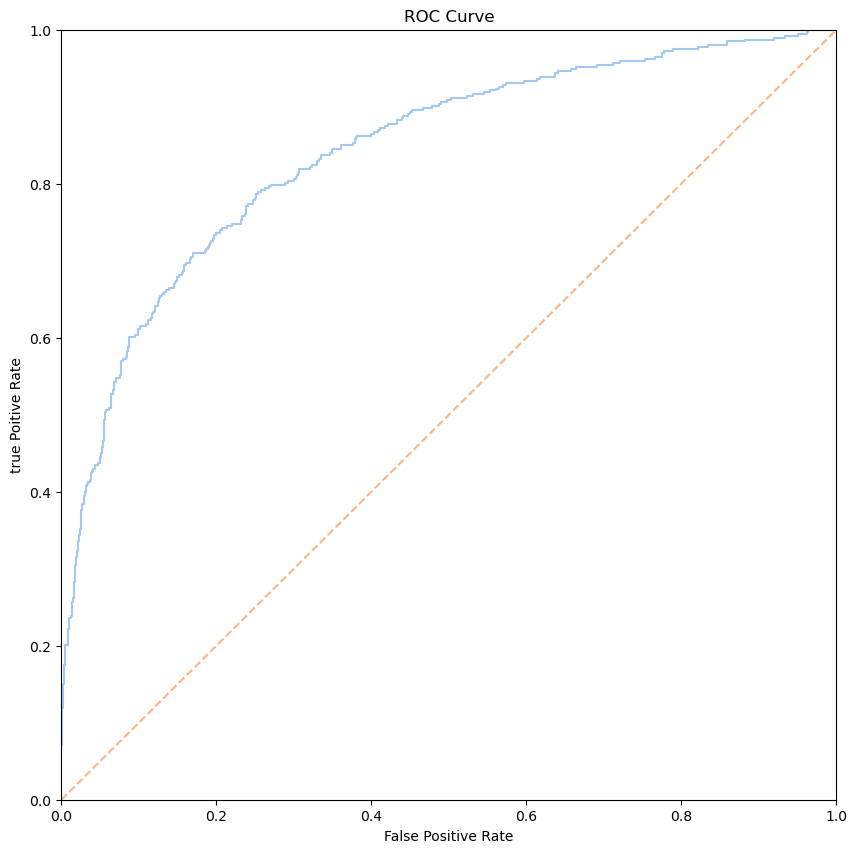

AUC: 0.8420159258713865


In [97]:
probabilities_val = model_svc.predict_proba(X_val)
proba_one_val = probabilities_val[:,1]

fpr, tpr, thresholds = roc_curve(y_val, proba_one_val)

plt.figure(figsize = (10,10))
plt.plot(fpr, tpr, linestyle = '-')
plt.plot([0,1], [0,1], linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('true Poitive Rate')
plt.title('ROC Curve')

plt.show()

auc_roc = roc_auc_score (y_val, proba_one_val)
print('AUC:', auc_roc)

Whilst the F1 score was significantly lower than the Random Forest Model, the AUC score for the SVC model came out as 0.84, the highest of all the models tested against. 

These graphs, AUC/ROC scores, and F1 scores will be discussed further in the PDF document. 

In [98]:
from sklearn.metrics import confusion_matrix, classification_report

In [99]:
print(classification_report(y_test, svc_predicted_val))
print(confusion_matrix(y_test, svc_predicted_val))

              precision    recall  f1-score   support

           0       0.78      0.60      0.68      1587
           1       0.19      0.36      0.25       413

    accuracy                           0.55      2000
   macro avg       0.49      0.48      0.46      2000
weighted avg       0.66      0.55      0.59      2000

[[956 631]
 [265 148]]


956 true positives,
631 false positives,
265 false negatives,
148 true negatives

In [100]:
print(classification_report(y_test, RFC_predicted_val))
print(confusion_matrix(y_test, RFC_predicted_val))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1587
           1       0.18      0.17      0.18       413

    accuracy                           0.68      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.66      0.68      0.67      2000

[[1282  305]
 [ 344   69]]


1282 true positives,
305 false positives,
344 false negatives,
69 true negatives